In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
load_error = pd.read_csv("../src/data/load_errors_date_1.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
pv_error = pd.read_csv("../src/data/pv_errors_date_1.csv", parse_dates = ["date"]).drop("Unnamed: 0", axis = 1)
load_error.head(2)

,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,date,rmse
0,-0.9375,-3.40625,0.750000,1.1875,-5.359375,1.31250,5.031250,9.2500,1.734375,38.50000,...,2.2500,-0.5625,-20.0625,-19.5000,-17.0625,5.8125,-38.0625,-38.8125,2021-04-14 00:00:00,16.650244
1,-2.7500,1.46875,1.546875,-4.3125,2.203125,5.53125,9.203125,2.0625,34.828125,-39.90625,...,-0.5625,-20.0625,-19.5000,-17.0625,5.8125,-38.0625,-38.8125,-36.3750,2021-04-14 00:10:00,17.002757


In [10]:
N= 60
def remove_outliers(df, N, pl= 5, pu=95):
    steps = [str(i) for i in range(N)]
    print("Shape before", df.shape)
    upper = np.percentile(df[str(N-1)], pu)
    lower = np.percentile(df[str(N-1)], pl)
    for step in steps:
        df = df[(df[step] < upper) & (df[step] > lower)]
    print("Shape after", df.shape)
    return df


load_error = remove_outliers(load_error, N)

Shape before (1311, 62)
Shape after (241, 62)


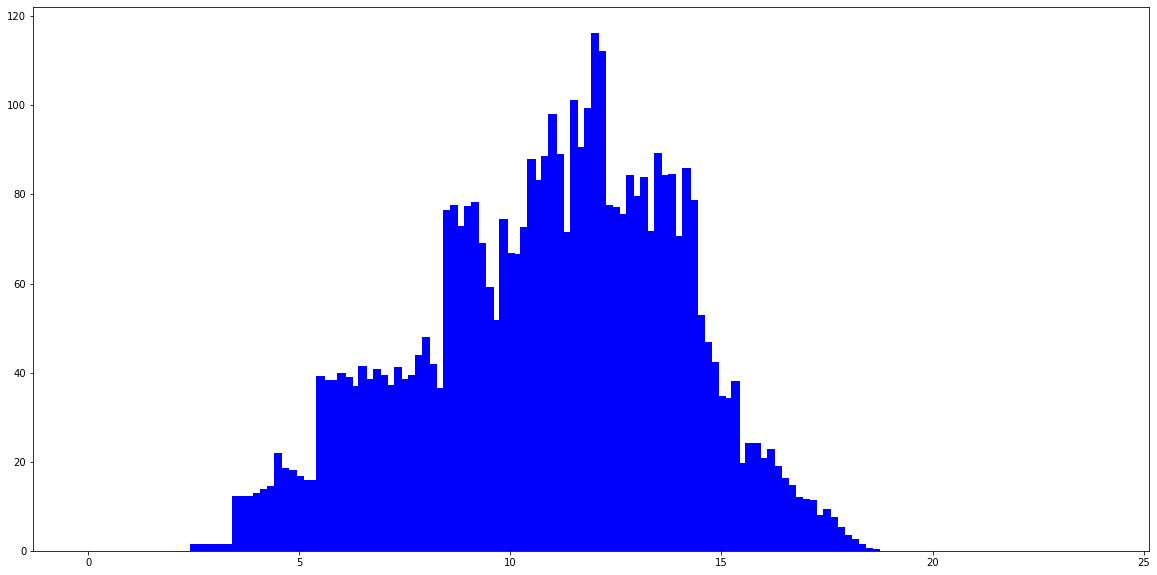

In [11]:
import time
plt.figure(figsize = ( 20,10))


for (hour, minute), errors in pv_error.groupby([pv_error.date.dt.hour, pv_error.date.dt.minute]):
    #print("Average errors at {}:{}".format(hour, minute))
    #plt.figure(figsize = (20,5))
    #plt.plot(np.mean(errors.filter(steps), axis = 0))
    #plt.show()

    rmse = (np.std(errors["10"]))
    plt.bar(hour + minute/60, rmse,  width = 0.20, color = "blue", alpha= 1)

plt.show()

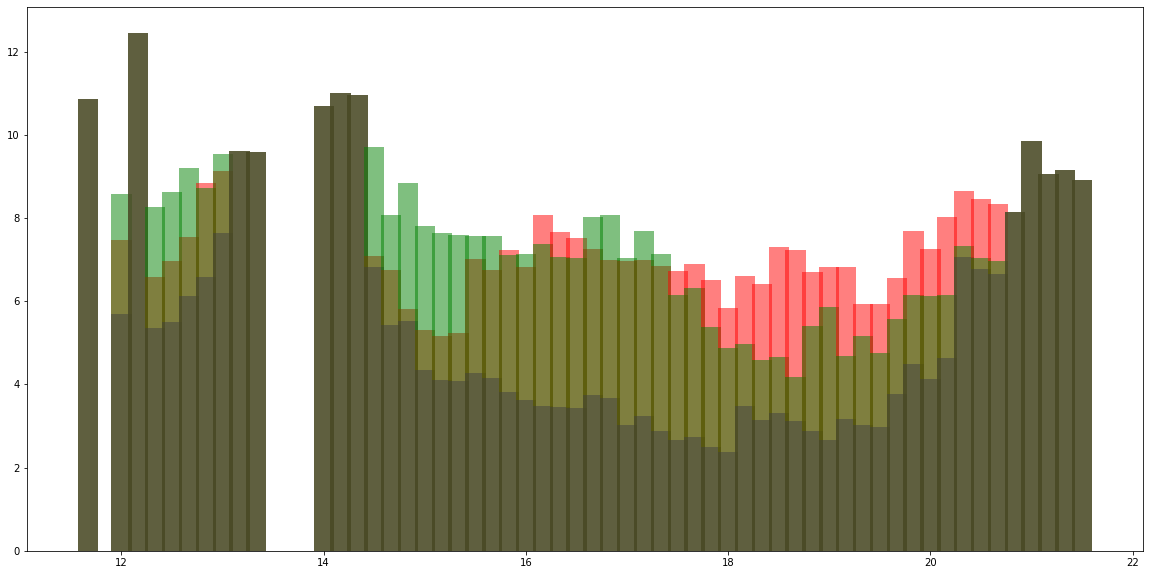

,i,type,prob,0,1,2,3,4,5,6,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.333333,-9.265625,-2.46875,-18.140625,12.1250,28.421875,4.87500,26.968750,...,-5.6250,-8.4375,-9.1875,-13.8750,-9.5625,-0.5625,-6.9375,-3.9375,-3.7500,-2.6250
1,0.0,1.0,0.333333,-9.265625,-2.46875,-18.140625,12.1250,28.421875,4.87500,26.968750,...,-5.6250,-8.4375,-9.1875,-13.8750,-9.5625,-0.5625,-6.9375,-3.9375,-3.7500,-2.6250
2,0.0,2.0,0.333333,-9.265625,-2.46875,-18.140625,12.1250,28.421875,4.87500,26.968750,...,-5.6250,-8.4375,-9.1875,-13.8750,-9.5625,-0.5625,-6.9375,-3.9375,-3.7500,-2.6250
3,1.0,0.0,0.343955,-20.718750,-11.50000,-19.687500,-32.8750,-21.625000,-12.56250,-2.046875,...,-9.1875,-13.8750,-9.5625,-10.6875,-6.9375,-3.9375,-3.7500,-4.8750,1.6875,-0.7500
4,1.0,1.0,0.394025,8.640625,7.56250,21.187500,0.0000,20.421875,6.37500,5.265625,...,3.0000,1.5000,-0.3750,-0.5625,-2.4375,-3.0000,7.1250,-2.6250,2.6250,9.3750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,54.0,1.0,0.333333,3.343750,-5.25000,-6.046875,-5.1875,-2.281250,-1.96875,-14.125000,...,-34.8750,-7.3125,-33.5625,-16.6875,-16.3125,-7.3125,-27.3750,18.5625,3.7500,1.6875
164,54.0,2.0,0.333333,3.343750,-5.25000,-6.046875,-5.1875,-2.281250,-1.96875,-14.125000,...,-34.8750,-7.3125,-33.5625,-16.6875,-16.3125,-7.3125,-27.3750,18.5625,3.7500,1.6875
165,55.0,0.0,0.333333,-8.671875,-8.87500,-7.828125,-4.3750,-3.750000,-15.09375,-13.109375,...,-7.3125,-33.5625,-16.6875,-16.3125,-7.3125,-27.3750,18.5625,3.7500,1.6875,-26.4375
166,55.0,1.0,0.333333,-8.671875,-8.87500,-7.828125,-4.3750,-3.750000,-15.09375,-13.109375,...,-7.3125,-33.5625,-16.6875,-16.3125,-7.3125,-27.3750,18.5625,3.7500,1.6875,-26.4375


In [12]:

def create_scenario_df(N, all_errors):
    c = ["i", "type", "prob"]
    steps = [str(i) for i in range(N)]
    df = pd.DataFrame(columns = c + steps)
    i = 0
    step = 0
    plt.figure(figsize = (20,10))
    for (hour, minute), errors in all_errors.groupby([all_errors.date.dt.hour, all_errors.date.dt.minute]):
        step_errors = errors.filter(steps)
        _mean = np.mean(step_errors, axis = 0)
        _min = np.min(step_errors, axis = 0)
        _max = np.max(step_errors, axis = 0)
        stds = np.array([np.std(_min), np.std(_max), np.std(_mean)]).sum()
        df.loc[i] = _min
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 0
        df.loc[i]["prob"] = np.std(_min)/stds
        i += 1
        df.loc[i] = _max
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 1
        df.loc[i]["prob"] = np.std(_max)/stds
        i += 1
        df.loc[i] = _mean
        df.loc[i]["i"] = step
        df.loc[i]["type"] = 2
        df.loc[i]["prob"] = np.std(_mean)/stds
        i += 1
        step += 1

        """
        plt.figure(figsize = (20,3))c
        plt.plot(np.mean(step_errors, axis = 0), color = "green")
        plt.plot(l_min,color = "blue")
        plt.plot(l_max, color = "red")
        plt.show()
        time.sleep(0.6)
        """


        plt.bar(hour + minute/60, np.std(_mean), width = 0.20, color = "blue", alpha= 0.5)
        plt.bar(hour + minute/60, np.std(_min), width = 0.20, color = "red", alpha=0.5)
        plt.bar(hour + minute/60, np.std(_max), width = 0.20, color = "green", alpha= 0.5)
    return df.reset_index(drop=True)



load_df = create_scenario_df(N, load_error)
plt.show() 
load_df

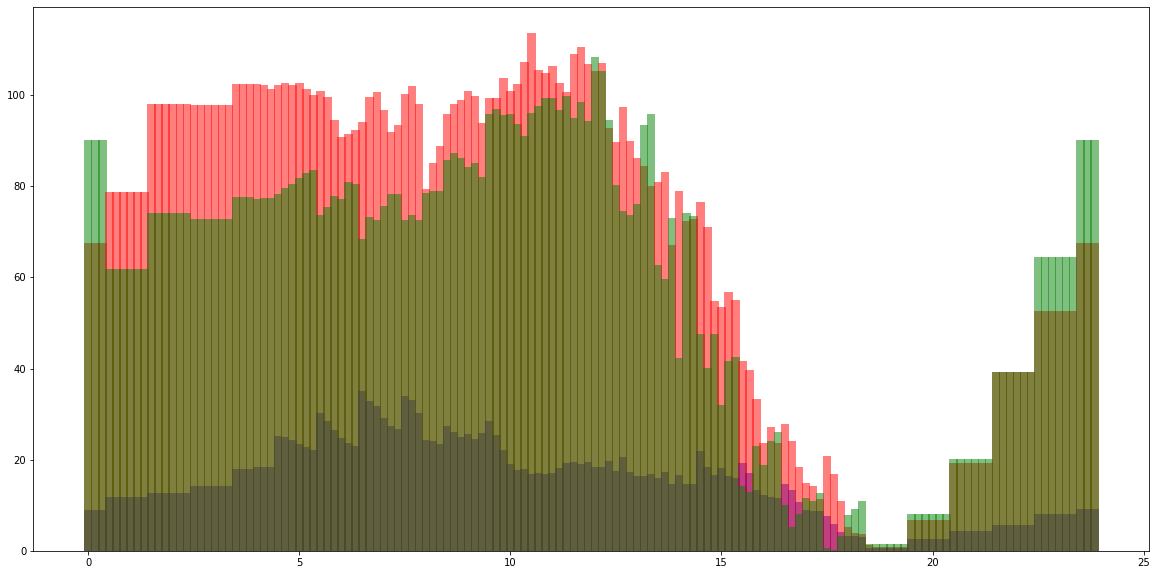

,i,type,prob,0,1,2,3,4,5,6,...,50,51,52,53,54,55,56,57,58,59
0,0.0,0.0,0.405289,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.359816,-121.859816,-158.599300,-137.224300,-126.724300,-146.992853,-150.976927,-136.726927,-179.652798,-287.342615
1,0.0,1.0,0.540793,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,181.932975,225.432975,211.487157,221.612157,221.987157,252.386000,253.136000,263.636000,267.239136,283.739136
2,0.0,2.0,0.053918,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,2.580438,39.948085,9.272223,15.514870,19.706047,-2.043850,7.375267,4.551738,-7.324936,-12.641113
3,1.0,0.0,0.405289,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.359816,-121.859816,-158.599300,-137.224300,-126.724300,-146.992853,-150.976927,-136.726927,-179.652798,-287.342615
4,1.0,1.0,0.540793,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,181.932975,225.432975,211.487157,221.612157,221.987157,252.386000,253.136000,263.636000,267.239136,283.739136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,142.0,1.0,0.540409,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,181.932975,225.432975,211.487157,221.612157,221.987157,252.386000,253.136000,263.636000,267.239136,283.739136
428,142.0,2.0,0.054508,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-3.824037,36.418150,4.279212,12.247962,16.865150,-4.510721,5.778342,2.075217,-12.326306,-21.021619
429,143.0,0.0,0.405084,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,-135.359816,-121.859816,-158.599300,-137.224300,-126.724300,-146.992853,-150.976927,-136.726927,-179.652798,-287.342615
430,143.0,1.0,0.540409,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,181.932975,225.432975,211.487157,221.612157,221.987157,252.386000,253.136000,263.636000,267.239136,283.739136


In [13]:
pv_df = create_scenario_df(N, pv_error)
plt.show()
pv_df

In [14]:
load_df.to_csv("../src/data/load_scenarios_new.csv")
pv_df.to_csv("../src/data/pv_scenarios_new.csv")

In [17]:
load_df.iloc[50:65]

,i,type,prob,0,1,2,3,4,5,6,...,50,51,52,53,54,55,56,57,58,59
50,16.0,2.0,0.249277,-4.093750,-5.812500,-6.867188,-4.312500,-4.179688,-4.078125,-4.515625,...,-1.500000,-3.656250,-3.375000,-0.093750,0.937500,1.500000,1.87500,4.78125,2.71875,2.437500
51,17.0,0.0,0.304822,-5.343750,-6.000000,-4.125000,-13.000000,-6.593750,-9.093750,-5.953125,...,-4.125000,-6.750000,-5.062500,-2.812500,-9.375000,-1.500000,-0.93750,-0.56250,1.68750,-1.875000
52,17.0,1.0,0.452001,0.078125,-0.750000,2.203125,8.500000,2.156250,3.375000,2.796875,...,-3.187500,0.000000,4.875000,4.687500,12.375000,5.250000,10.50000,6.00000,3.18750,0.562500
53,17.0,2.0,0.243176,-2.632812,-3.375000,-0.960938,-2.250000,-2.218750,-2.859375,-1.578125,...,-3.656250,-3.375000,-0.093750,0.937500,1.500000,1.875000,4.78125,2.71875,2.43750,-0.656250
54,18.0,0.0,0.309423,-0.656250,1.468750,-9.046875,-3.125000,-5.781250,-3.750000,-3.953125,...,-6.750000,-5.062500,-2.812500,-9.375000,-1.500000,-0.937500,-0.56250,1.68750,-1.87500,-9.562500
55,18.0,1.0,0.448835,-0.015625,2.593750,7.875000,2.062500,3.218750,2.531250,8.625000,...,0.000000,4.875000,4.687500,12.375000,5.250000,10.500000,6.00000,3.18750,0.56250,2.062500
56,18.0,2.0,0.241742,-0.335938,2.031250,-0.585938,-0.531250,-1.281250,-0.609375,2.335938,...,-3.375000,-0.093750,0.937500,1.500000,1.875000,4.781250,2.71875,2.43750,-0.65625,-3.750000
57,19.0,0.0,0.371759,1.656250,-9.937500,-7.265625,-18.437500,-23.718750,-36.843750,-29.421875,...,-16.312500,-9.750000,-11.625000,-15.562500,-12.000000,-15.562500,-15.56250,-22.31250,-20.43750,-16.125000
58,19.0,1.0,0.400928,17.359375,7.718750,3.609375,12.750000,2.593750,8.343750,1.046875,...,4.875000,4.687500,12.375000,5.250000,10.500000,6.000000,3.18750,0.56250,2.06250,4.500000
59,19.0,2.0,0.227313,7.773438,-0.015625,-1.300781,-2.109375,-6.136719,-6.843750,-14.867188,...,-6.515625,-2.765625,-4.265625,-6.796875,-2.578125,-2.015625,-2.06250,-7.68750,-9.18750,-2.859375
